# Propagation of Gaussian (and Shot) Noise during Shape Analysis

## (1.) Introduction
Geometric machine learning has become an important tool for biologists, especially as the amount of data that can be acquired within any given subfield is increasing exponentially. Geometric machine learning permits us to parse through amounts of data that would otherwise be out of reach by giving us insights into the parameters that might be important for biologists to go through in depth. It is important that we understand some of the important features (and pitfalls) of geometric machine learning as we would want to understand with any other new method of analysis. We hope to contribute to the growing field of geometric machine learning by doing some important characterizations of noise propagation during shape analyis (and eventually the geometric machine learning that is performed on these shapes) that has so far received little attention within the field.

## (2.) Justification of Study
Many previous analyses of shape using geometric machine learning depended on reliable (approximately noiseless) labeled data. We believe that there are two important shortcomings with the assumption of approximately noiseless data. The first shortcoming of this assumption is not every labeled dataset that we use for biological analysis can be considered approximately noiseless, especially with as these datasets grow larger. These large training datasets are often produced through crowdsourcing [1] or labeling of datasets by deep learning methods that use some human labeled subset of the data [2]. The issue with the first method is that crowdsourcing can be quite expensive for larger datasets [3] and human provided labels are often inconsistent among individuals even if given specific instructions and structure for labeling data [4]. The issue with the second method is that deep learning methods are subject to errors in the human labeled subset of the data, which can propagate through to the rest of the labels [5]. The second shortcoming of this assumption is any dataset that we know to be quite noisy is automatically excluded from geometric machine learning analysis even if the noise might not have changed the outcomes. The above shortcomings justify the proposed study because it is important to understand if noise in the data changes the outcomes of geometric machine learning (e.g. clustering) and what amount of noise cannot be overcome by the geometric machine learning algorithms.

## (3.) Background
In conventional machine learning, many empirical studies have shown that noise in data set dramatically led to decreased classification accuracy and poor prediction results [5,6,7]. The occurrences of noisy data in data set can thus significantly impact prediction of any meaningful information. Therefore, the problem of identifying and handling noise in prediction application has been an active area of research and people have developed effective techniques for dealing with noise [5,6,7]. In contrast, the effect of noise for machine learning on manifolds is not that well studied. There have been efforts to quantify the effect of noise on the Fréchet mean [8,9,10] and develop appropriate tools to compute the Fréchet mean for noisy datasets [10,11,12]. A few frameworks for noisy data have been developed in related areas like manifold learning [13] and manifold-based dimension reduction [14]. But, there is need for a more systemic study on error propagation in shape data and its effects on various geometric machine learning algorithms.


## (4.) Gaussian Noise and Shot Noise Datasets
The two methods of noise addition that we are going to use to generate synthetic datasets are (1) Gaussian noise and (2) shot noise. The Gaussian noise synthetic datasets are generated by adding Gaussian noise to each point in the dataset. These datasets are meant to imitate the noise naturally present due to human error or deep learning mislabeling. The shot noise synthetic datasets are generated by adding Gaussian noise to each point in the dataset with some probability. These datasets are meant to imitate the noise present if some points in the dataset are much easier to label than other points (e.g. image has poor resolution near edges, motion blur, etc.) which only causes noise for certain points. The below sections are going to generate synthetic datasets from original data for different scenarios that include both landmarks and curves.

## (5.) Creation of Gaussian Noise (special case) for Optical Nerves

INFO: Using numpy backend


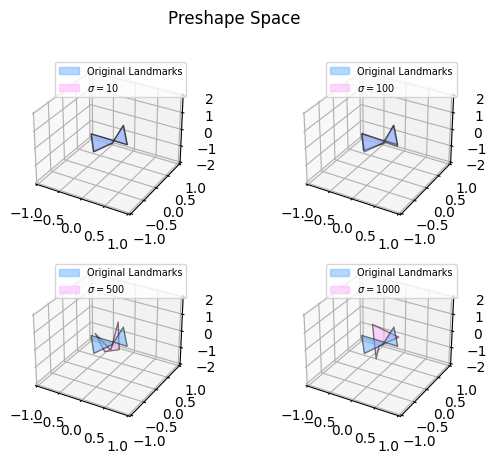

In [1]:
import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

from geomstats.geometry.pre_shape import PreShapeSpace
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def gaussian_noise(set_of_landmarks, sigma) :
    """Add Gaussian noise to a data set of landmarks.
    
    Parameters
    ----------
    set_of_landmarks : array-like
        Original data set
    sigma : float
        Width of the Gaussian to use for noise.
​
    Returns
    -------
    noisy_data : array-like, of same dimensions as set_of_landmarks
        Data set with noise added to the original set of landmarks
    """
    noisy_data = set_of_landmarks + gs.random.normal(0.0, sigma, size = set_of_landmarks.shape)
    return noisy_data

def optical_nerves_gaussian_plot_preshape(nerve_ind) :
    """Plot original optical nerve data against data with noise added.

    Plots four example noisy data sets with parameters 
        - sigma = 10
        - sigma = 100
        - sigma = 500
        - sigma = 1000
    
    Parameters
    ----------
    nerve_ind : int, in the range 0 to 21
        Pick which eye data set to add noise to and plot.
    
    Returns
    -------
    Plots of the four noisy datasets.
    """
    nerves, labels, monkeys = data_utils.load_optical_nerves()
    
    m_ambient = 3
    k_landmarks = 5
    preshape = PreShapeSpace(m_ambient = m_ambient, k_landmarks = k_landmarks)
    
    noisy_landmarks_01 = preshape.projection(gaussian_noise(nerves, 10))
    noisy_landmarks_02 = preshape.projection(gaussian_noise(nerves, 100))
    noisy_landmarks_03 = preshape.projection(gaussian_noise(nerves, 500))
    noisy_landmarks_04 = preshape.projection(gaussian_noise(nerves, 1000))
    noisy_landmarks_preshape =[noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    landmarks_preshape = preshape.projection(nerves)
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$\sigma = 10$', 2 : r'$\sigma = 100$', 3 : r'$\sigma = 500$', 4 : r'$\sigma = 1000$'}
    label_to_color = {
        0: (102 / 255, 178 / 255, 255 / 255, 1.0),
        1: (255 / 255, 178 / 255, 255 / 255, 1.0),
    }
    
    fig = plt.figure()
    fig.suptitle('Preshape Space')
    ax01 = fig.add_subplot(221, projection = "3d") 
    ax02 = fig.add_subplot(222, projection = "3d") 
    ax03 = fig.add_subplot(223, projection = "3d") 
    ax04 = fig.add_subplot(224, projection = "3d")
    ax= [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((-1, 1))
        axi.set_ylim((-1, 1))
        axi.set_zlim((-2, 2))

    for i in range(4):
        for label, nerve in enumerate([landmarks_preshape[nerve_ind], noisy_landmarks_preshape[i][nerve_ind]]) :
            x = nerve[:, 0]
            y = nerve[:, 1]
            z = nerve[:, 2]
            verts = [list(zip(x, y, z))]
    
            poly = Poly3DCollection(verts, alpha = 0.5)
            color = label_to_color[int(label)]
            poly.set_color(colors.rgb2hex(color))
            poly.set_edgecolor("k")
            ax[i].add_collection3d(poly)
    
            patch_0 = mpatches.Patch(color = label_to_color[0], label = label_to_str[0], alpha = 0.5) 
            patch_1 = mpatches.Patch(color = label_to_color[1], label = label_to_str[i+1], alpha = 0.5)
            ax[i].legend(handles = [patch_0, patch_1], prop={"size": 7})

    plt.show()

num_nerve = 5
optical_nerves_gaussian_plot_preshape(num_nerve)

## (6.) Creation of Gaussian Noise (special case) for Schizophrenia Patients

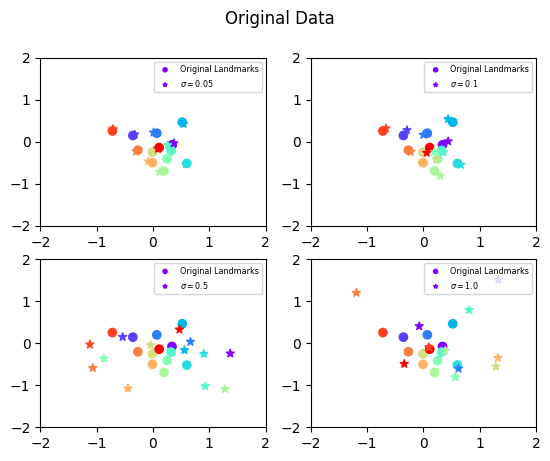

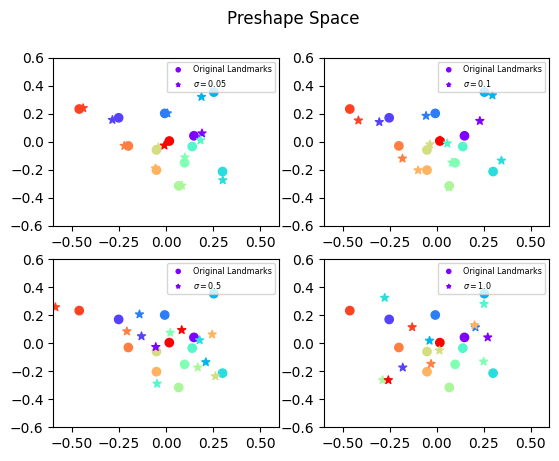

In [2]:
import matplotlib.cm as cm
import numpy as np

def load_schizophrenia_data() :
    """Load data from schizophrenia_data.csv.
    
    Load the dataset of sets of 13 landmarks, labelled 1-13, in 2D on patients brain data
    - (1) splenium, posteriormost point on corpus callosum
    - (2) genu, anteriormost point on corpus callosum
    - (3) top of corpus callosum, uppermost point on arch of callosum (all three to an approximate registration on the diameter of the callosum)
    - (4) top of head, a point relaxed from a standard landmark along the apparent margin of the dura
    - (5) tentorium of cerebellum at dura
    - (6) top of cerebellum; (7) tip of fourth ventricle
    - (8) bottom of cerebellum
    - (9) top of pons, anterior margin
    - (10) bottom of pons, anterior margin
    - (11) optic chiasm
    - (12) frontal pole, extension of a line from #1 through #2 until it intersects the dura
    - (13) superior colliculus
    
    Label 0 refers to a "normal" patient, and Label 1 to an patient with schizophrenia.
    
    References
    ----------
    .. https://sbmorphometrics.org/data/book-schizo.dta
    .. Bookstein, F.L. Biometrics, biomathematics and the morphometric synthesis. Bltn Mathcal Biology 58, 313–365 (1996). https://doi.org/10.1007/BF02458311
        
    Returns
    -------
    data : array-like, shape = [28, 13, 2]
        Data representing the 13 landmarks, in 2D, for 28 different patients.
    labels : array-like, shape = [28,]
        Labels in {0, 1} classifying the corresponding patient as normal (label = 0) or schizophrenic (label = 1).
    pateints : array-like, shape = [28,]
        Indices in 0...28 referencing the index of the patient to which the data belongs.
    """
    
    brains = pd.read_csv('schizophrenia_data.csv', header = 0, index_col = 0)
    brains_gs = brains.to_numpy(dtype = 'float64')

    data = gs.reshape(brains_gs, (28, 13, 2))
    labels = np.append(gs.zeros(14), gs.ones(14))
    patients = gs.arange(28)

    return data, labels, patients

def schizophrenia_gaussian_plot_original(brain_ind) :
    """Plot original brain data against data with noise added.
    Plots four example noisey data sets with parameters 
        - sigma = 0.05
        - sigma = 0.1
        - sigma = 0.5
        - sigma = 1.0
    
    Parameters
    ----------
    brain_ind : int, in the range 0-27
        Pick which brain data set to add noise to and plot.
    
    Returns
    -------
    Four plots
    """
    brains, labels, patients = load_schizophrenia_data()

    noisy_landmarks_01 = gaussian_noise(brains, 0.05)
    noisy_landmarks_02 = gaussian_noise(brains, 0.1)
    noisy_landmarks_03 = gaussian_noise(brains, 0.5)
    noisy_landmarks_04 = gaussian_noise(brains, 1.0)
    noisy_landmarks =[noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    
    fig = plt.figure()
    fig.suptitle('Original Data')
    ax01 = fig.add_subplot(221) 
    ax02 = fig.add_subplot(222) 
    ax03 = fig.add_subplot(223) 
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((- 2.0, 2.0))
        axi.set_ylim((- 2.0, 2.0))
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$\sigma = 0.05$', 2 : r'$\sigma = 0.1$', 3 : r'$\sigma = 0.5$', 4 : r'$\sigma = 1.0$'}
    
    cols = cm.rainbow(gs.linspace(0, 1, 13))
    
    for i in range(4):
        x_orig = brains[brain_ind][:,0] 
        y_orig = brains[brain_ind][:,1]
        x_noise = noisy_landmarks[i][brain_ind][:,0] 
        y_noise = noisy_landmarks[i][brain_ind][:,1]
        
        ax[i].scatter(x_orig, y_orig, color = cols, label = label_to_str[0])
        ax[i].scatter(x_noise, y_noise, marker = '*', color = cols, label = label_to_str[i+1])
        
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')
        
    plt.show()

def schizophrenia_gaussian_plot_preshape(brain_ind) :
    """Plot original brain data against data with noise added.
    Plots four example noisey data sets with parameters 
        - sigma = 0.05
        - sigma = 0.1
        - sigma = 0.5
        - sigma = 1.0
    
    Parameters
    ----------
    brain_ind : int, in the range 0-27
        Pick which brain data set to add noise to and plot.
    
    Returns
    -------
    Four plots
    """
    brains, labels, patients = load_schizophrenia_data()
    
    m_ambient = 2
    k_landmarks = 13
    preshape = PreShapeSpace(m_ambient = m_ambient, k_landmarks = k_landmarks)
    
    landmarks_preshape = preshape.projection(brains)
    noisy_landmarks_01 = preshape.projection(gaussian_noise(brains, 0.05))
    noisy_landmarks_02 = preshape.projection(gaussian_noise(brains, 0.1))
    noisy_landmarks_03 = preshape.projection(gaussian_noise(brains, 0.5))
    noisy_landmarks_04 = preshape.projection(gaussian_noise(brains, 1.0))
    noisy_landmarks_preshape =[noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    
    fig = plt.figure()
    fig.suptitle('Preshape Space')
    ax01 = fig.add_subplot(221) 
    ax02 = fig.add_subplot(222) 
    ax03 = fig.add_subplot(223) 
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((-.6,.6)); axi.set_ylim((-.6, .6))
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$\sigma = 0.05$', 2 : r'$\sigma = 0.1$', 3 : r'$\sigma = 0.5$', 4 : r'$\sigma = 1.0$'}
    
    cols = cm.rainbow(gs.linspace(0, 1, 13))
    
    for i in range(4):
        x_orig = landmarks_preshape[brain_ind][:,0] 
        y_orig = landmarks_preshape[brain_ind][:,1]
        x_noise = noisy_landmarks_preshape[i][brain_ind][:,0] 
        y_noise = noisy_landmarks_preshape[i][brain_ind][:,1]
        ax[i].scatter(x_orig, y_orig, color = cols, label = label_to_str[0])
        ax[i].scatter(x_noise, y_noise, marker = '*', color = cols, label = label_to_str[i+1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')
        
    plt.show()

num_brain = 5
schizophrenia_gaussian_plot_original(num_brain)
schizophrenia_gaussian_plot_preshape(num_brain)

## (7.) Creation of Shot Noise (general case) for Optical Nerves of Monkeys

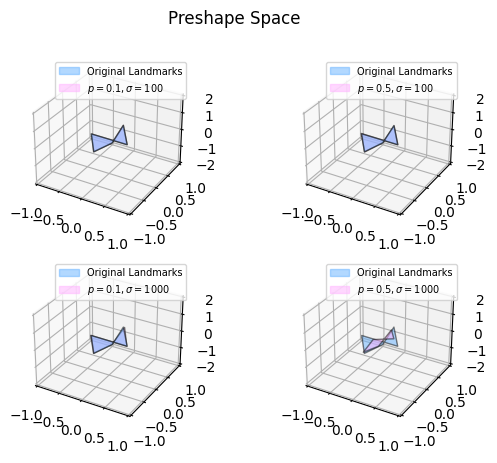

In [3]:
def shot_noise(set_of_landmarks, probability, sigma) :
    """Add gaussian shot noise to a data set of landmarks
    
    Parameters
    ----------
    set_of_landmarks : array-like
        Original data set
    probability : float, in the range 0 to 1
        Probability of getting introducing an error at each landmark
    sigma : float
        Sigma of the Gaussian distribution
​
    Returns
    -------
    noisy_data : array-like, of same dimensions as set_of_landmarks
        Data set with noise added to the original set of landmarks
    """
    rand_choice = gs.random.choice([0, 1], set_of_landmarks.shape, p = [1 - probability, probability])
    rand_norm = gs.random.normal(0.0, sigma, size = set_of_landmarks.shape)
    noisy_data = set_of_landmarks + rand_norm * rand_choice
    
    return noisy_data

def optical_nerves_shot_plot_preshape(nerve_ind):
    """Plot original optical nerve data against data with noise added.

    Plots four example noisy data sets with parameters 
        - sigma = 10
        - sigma = 100
        - sigma = 500
        - sigma = 1000
    
    Parameters
    ----------
    nerve_ind : int, in the range 0 to 21
        Pick which eye data set to add noise to and plot.
    
    Returns
    -------
    Plots of the four noisy datasets.
    """
    nerves, labels, monkeys = data_utils.load_optical_nerves()
    
    m_ambient = 3
    k_landmarks = 5
    preshape = PreShapeSpace(m_ambient = m_ambient, k_landmarks = k_landmarks)
    
    noisy_landmarks_01 = preshape.projection(shot_noise(nerves, 0.1, 100))
    noisy_landmarks_02 = preshape.projection(shot_noise(nerves, 0.5, 100))
    noisy_landmarks_03 = preshape.projection(shot_noise(nerves, 0.1, 1000))
    noisy_landmarks_04 = preshape.projection(shot_noise(nerves, 0.5, 1000))
    noisy_landmarks_preshape =[noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    landmarks_preshape = preshape.projection(nerves)
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$p = 0.1, \sigma = 100$', 2 : r'$p = 0.5, \sigma = 100$', 3 : r'$p = 0.1, \sigma = 1000$', 4 : r'$p = 0.5, \sigma = 1000$'}
    label_to_color = {
        0: (102 / 255, 178 / 255, 255 / 255, 1.0),
        1: (255 / 255, 178 / 255, 255 / 255, 1.0),
    }
    
    fig = plt.figure()
    fig.suptitle('Preshape Space')
    ax01 = fig.add_subplot(221, projection = "3d") 
    ax02 = fig.add_subplot(222, projection = "3d") 
    ax03 = fig.add_subplot(223, projection = "3d") 
    ax04 = fig.add_subplot(224, projection = "3d")
    ax= [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((-1, 1))
        axi.set_ylim((-1, 1))
        axi.set_zlim((-2, 2))

    for i in range(4):
        for label, nerve in enumerate([landmarks_preshape[nerve_ind], noisy_landmarks_preshape[i][nerve_ind]]) :
            x = nerve[:, 0]
            y = nerve[:, 1]
            z = nerve[:, 2]
            verts = [list(zip(x, y, z))]
            poly = Poly3DCollection(verts, alpha = 0.5)
            color = label_to_color[int(label)]
            poly.set_color(colors.rgb2hex(color))
            poly.set_edgecolor("k")
            ax[i].add_collection3d(poly)
            patch_0 = mpatches.Patch(color = label_to_color[0], label = label_to_str[0], alpha = 0.5) 
            patch_1 = mpatches.Patch(color = label_to_color[1], label = label_to_str[i+1], alpha = 0.5)
            ax[i].legend(handles = [patch_0, patch_1], prop={"size": 7})

    plt.show()

num_nerve = 5
optical_nerves_shot_plot_preshape(num_nerve)

## (8.) Creation of Shot Noise (general case) for Schizophrenia Patients

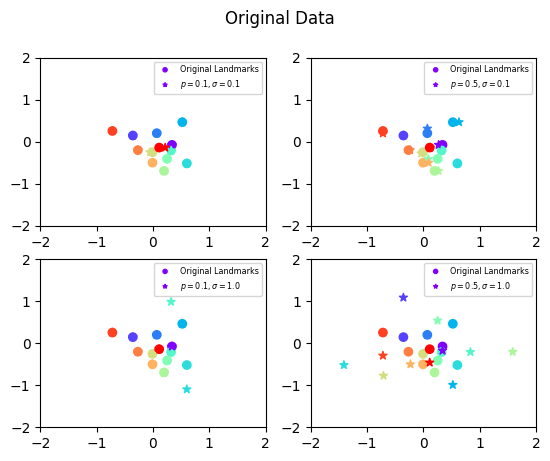

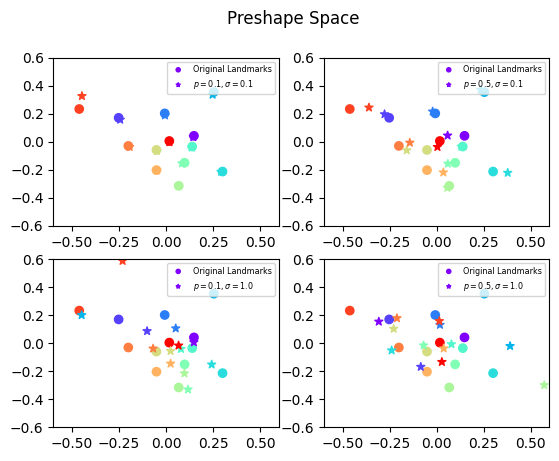

In [4]:
def schizophrenia_shot_plot_original(brain_ind) :
    """Plot original brain data against data with noise added.
    Plots four example noisey data sets with parameters 
        - p = 0.1, sigma = 0.1
        - p = 0.5, sigma = 0.1
        - p = 0.1, sigma = 1.0
        - p = 0.5, sigma = 1.0
    
    Parameters
    ----------
    brain_ind : int, in the range 0-27
        Pick which brain data set to add noise to and plot.
    
    Returns
    -------
    Four plots
    """
    brains, labels, patients = load_schizophrenia_data()
    
    landmarks_preshape = brains
    noisy_landmarks_01 = shot_noise(brains, 0.1, 0.1)
    noisy_landmarks_02 = shot_noise(brains, 0.5, 0.1)
    noisy_landmarks_03 = shot_noise(brains, 0.1, 1.0)
    noisy_landmarks_04 = shot_noise(brains, 0.5, 1.0)
    noisy_landmarks =[noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    
    fig = plt.figure()
    fig.suptitle('Original Data')
    ax01 = fig.add_subplot(221) 
    ax02 = fig.add_subplot(222) 
    ax03 = fig.add_subplot(223) 
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((-2.0, 2.0))
        axi.set_ylim((-2.0, 2.0))
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$p = 0.1, \sigma = 0.1$', 2 : r'$p = 0.5, \sigma = 0.1$', 3 : r'$p = 0.1, \sigma = 1.0$', 4 : r'$p = 0.5, \sigma = 1.0$'}
    
    cols = cm.rainbow(gs.linspace(0, 1, 13))
    
    for i in range(4) :
        x_orig = brains[brain_ind][:,0] 
        y_orig = brains[brain_ind][:,1]
        x_noise = noisy_landmarks[i][brain_ind][:,0] 
        y_noise = noisy_landmarks[i][brain_ind][:,1]
        ax[i].scatter(x_orig, y_orig, color = cols, label = label_to_str[0])
        ax[i].scatter(x_noise, y_noise, marker = '*', color = cols, label = label_to_str[i+1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')
        
    plt.show()

def schizophrenia_shot_plot_preshape(brain_ind) :
    """Plot original brain data against data with noise added.
    Plots four example noisey data sets with parameters 
        - p = 0.1, sigma = 0.1
        - p = 0.5, sigma = 0.1
        - p = 0.1, sigma = 1.0
        - p = 0.5, sigma = 1.0
    
    Parameters
    ----------
    brain_ind : int, in the range 0-27
        Pick which brain data set to add noise to and plot.
    
    Returns
    -------
    Four plots
    """
    brains, labels, patients = load_schizophrenia_data()
    
    m_ambient = 2
    k_landmarks = 13
    preshape = PreShapeSpace(m_ambient = m_ambient, k_landmarks = k_landmarks)
    
    landmarks_preshape = preshape.projection(brains)
    noisy_landmarks_01 = preshape.projection(shot_noise(brains, 0.1, 0.1))
    noisy_landmarks_02 = preshape.projection(shot_noise(brains, 0.5, 0.1))
    noisy_landmarks_03 = preshape.projection(shot_noise(brains, 0.1, 1.0))
    noisy_landmarks_04 = preshape.projection(shot_noise(brains, 0.5, 1.0))
    noisy_landmarks_preshape = [noisy_landmarks_01, noisy_landmarks_02, noisy_landmarks_03, noisy_landmarks_04]
    
    fig = plt.figure()
    fig.suptitle('Preshape Space')
    ax01 = fig.add_subplot(221) 
    ax02 = fig.add_subplot(222) 
    ax03 = fig.add_subplot(223) 
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
    
    for axi in ax:
        axi.set_xlim((-0.6, 0.6))
        axi.set_ylim((-0.6, 0.6))
    
    label_to_str = {0 : "Original Landmarks", 1 : r'$p = 0.1, \sigma = 0.1$', 2 : r'$p = 0.5, \sigma = 0.1$', 3 : r'$p = 0.1, \sigma = 1.0$', 4 : r'$p = 0.5, \sigma = 1.0$'}
    
    cols = cm.rainbow(gs.linspace(0, 1, 13))
    
    for i in range(4) :
        x_orig = landmarks_preshape[brain_ind][:,0] 
        y_orig = landmarks_preshape[brain_ind][:,1]
        x_noise = noisy_landmarks_preshape[i][brain_ind][:,0] 
        y_noise = noisy_landmarks_preshape[i][brain_ind][:,1]
        ax[i].scatter(x_orig, y_orig, color = cols, label = label_to_str[0])
        ax[i].scatter(x_noise, y_noise, marker = '*', color = cols, label = label_to_str[i+1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')
        
    plt.show()

num_brain = 5
schizophrenia_shot_plot_original(num_brain)
schizophrenia_shot_plot_preshape(num_brain)

## (9.) Creation of Gaussian Noise (special case) for Cancer Cells

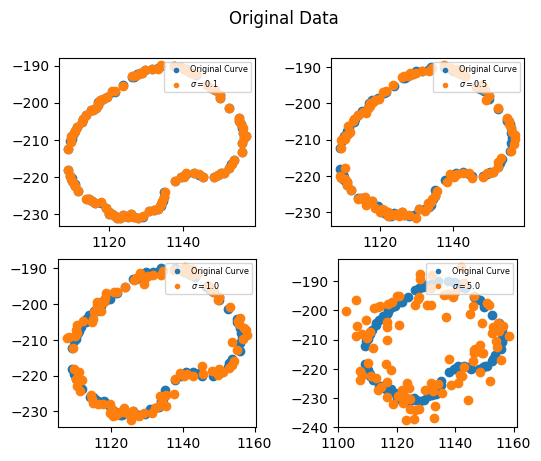

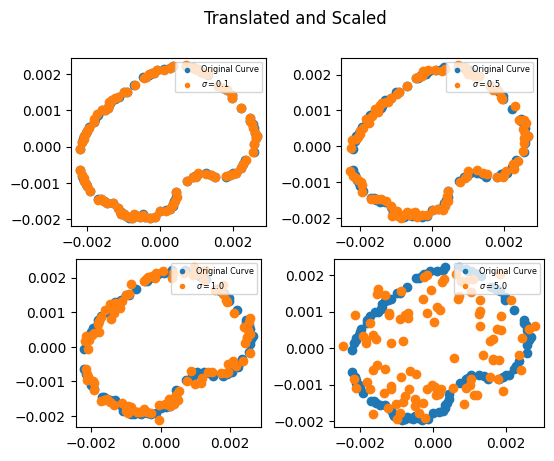

In [5]:
from geomstats.geometry.discrete_curves import DiscreteCurves
from geomstats.geometry.discrete_curves import SRVShapeBundle
from geomstats.geometry.euclidean import Euclidean

def curve_length(curve):
    return sum([
        gs.linalg.norm(curve[l+1] - curve[l]) 
        for l in range(0, k_sampling_points-1)
               ])

def interpolate(curve, nb_points) :
    """Interpolate a discrete curve with nb_points from a discrete curve.
    
    Parameters
    ----------
    curve : array-like
        The discrete curve that is going to be interpolated.
    nb_points : int
        Number of points to interpolate on the curve.
    
    Returns
    -------
    interpolation : array-like
        The interpolated curve with nb_points.
    """
    old_length = curve.shape[0]
    interpolation = gs.zeros((nb_points, 2))
    incr = old_length / nb_points
    pos = 0
    for i in range(nb_points) :
        index = int(gs.floor(pos))
        interpolation[i] = curve[index] + (pos - index) * (
            curve[(index + 1) % old_length] - curve[index]
        )
        pos += incr
    return interpolation

def preprocess(curve, tol = 1e-8) :
    """Preprocess curve to ensure that there are no consecutive duplicate points.
    
    Parameters
    ----------
    curve : array-like
        Original curve that is going to be preprocessed.
    tol : float
        Distance between points for which to consider them duplicate.
    
    Returns
    -------
    curve : array-like
        Preprocessed curve with no duplicate points.
    """
    dist = curve[1:] - curve[:-1]
    dist_norm = gs.sqrt(gs.sum(dist**2, axis=1))
    if gs.any(dist_norm < tol) :
        for i in range(len(curve) - 1):
            if gs.sqrt(gs.sum(gs.square(curve[i + 1] - curve[i]), axis = 0)) < tol :
                curve[i + 1] = (curve[i] + curve[i + 2]) / 2
    return curve

def interpolate_curves(curves, nb_points) :
    """Interpolate multiple discrete curves with nb_points.
    
    Parameters
    ----------
    curves : array-like
        Discrete curves that are going to be interpolated.
    nb_points : int
        Number of points to interpolate on the curves.
    
    Returns
    -------
    interpolated_curves : array-like
        Interpolated curves with nb_points.
    """
    interpolated_curves = gs.empty([len(curves), nb_points, len(curves[0][0])])
    for idx, curve in enumerate(curves) :
        interpolated_curves[idx] = interpolate(curve, nb_points)
    return interpolated_curves

def curve_gaussian_noise(curves, sigma) :
    """Add Gaussian noise to discrete curves.
    
    Parameters
    ----------
    curves : array-like
        Discrete curves that are going to have noise added.
    sigma : float
        Width of the Gaussian to use for noise.
    
    Returns
    -------
    noisy_curves : array-like
        Curves with added Gaussian noise normal to the discrete curve.
    """
    normals = gs.empty(curves.shape)
    for idx, curve in enumerate(curves) :
        for jdx in range(curve.shape[0]) :
            t_1 = curve[(jdx + 1) % curve.shape[0]] - curve[jdx]
            t_2 = curve[jdx - 1] - curve[jdx]
            normal = t_1 * gs.linalg.norm(t_2) + gs.linalg.norm(t_1) * t_2
            if gs.linalg.norm(normal) > 0 :
                normals[idx, jdx] = normal / gs.linalg.norm(normal)
            else :
                normals[idx, jdx] = normal
    noisy_curves = curves + normals * gs.random.normal(0.0, sigma, size = (normals.shape[0], normals.shape[1], 1))
    return noisy_curves

def cancer_gaussian_plot_original(num_cell, k_sampling_points) :
    """Plot original cancer cell data against data with noise added.
    Plots four example noisy data sets with parameters
        - sigma = 0.1
        - sigma = 0.5
        - sigma = 1.0
        - sigma = 5.0
    
    Parameters
    ----------
    num_cell : int, in the range 0 - 650
        Pick which cancer cell dataset to add noise to and plot.
    k_sampling_points : int
        Number of points to sample on each curve.
    
    Returns
    -------
    Four plots
    """

    cells, lines, treatments = data_utils.load_cells()
    inter_curves = preprocess(interpolate_curves(cells, k_sampling_points))

    r2 = Euclidean(dim = 2)
    curves_r2 = DiscreteCurves(ambient_manifold = r2)
    preshape = PreShapeSpace(m_ambient = 2, k_landmarks = k_sampling_points)
    shape_bundle = SRVShapeBundle(ambient_manifold = r2, k_sampling_points = k_sampling_points)

    noisy_curves_01 = curve_gaussian_noise(inter_curves, 0.1)
    noisy_curves_02 = curve_gaussian_noise(inter_curves, 0.5)
    noisy_curves_03 = curve_gaussian_noise(inter_curves, 1.0)
    noisy_curves_04 = curve_gaussian_noise(inter_curves, 5.0)
    noisy_curves = [noisy_curves_01, noisy_curves_02, noisy_curves_03, noisy_curves_04]
        
    label_to_str = {0 : "Original Curve", 1 : r'$\sigma = 0.1$', 2 : r'$\sigma = 0.5$', 3 : r'$\sigma = 1.0$', 4 : r'$\sigma = 5.0$'}

    fig = plt.figure()
    fig.suptitle('Original Data')
    ax01 = fig.add_subplot(221)
    ax02 = fig.add_subplot(222)
    ax03 = fig.add_subplot(223)
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
        
    for axi in ax:
        axi.set_aspect('equal', 'box')
        
    for i in range(len(ax)) :
        ax[i].plot()
        ax[i].scatter(inter_curves[num_cell][:, 0], inter_curves[num_cell][:, 1], label = label_to_str[0])
        ax[i].scatter(noisy_curves[i][num_cell][:, 0], noisy_curves[i][num_cell][:, 1], label = label_to_str[i + 1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')

    plt.show()

def cancer_gaussian_plot_scaled(num_cell, k_sampling_points) :
    """Plot original cancer cell data against data with noise added.
    Plots four example noisy data sets with parameters
        - sigma = 0.1
        - sigma = 0.5
        - sigma = 1.0
        - sigma = 5.0
    
    Parameters
    ----------
    num_cell : int, in the range 0 - 650
        Pick which cancer cell dataset to add noise to and plot.
    k_sampling_points : int
        Number of points to sample on each curve.
    
    Returns
    -------
    Four plots
    """

    cells, lines, treatments = data_utils.load_cells()
    inter_curves = preprocess(interpolate_curves(cells, k_sampling_points))

    r2 = Euclidean(dim = 2)
    curves_r2 = DiscreteCurves(ambient_manifold = r2)
    preshape = PreShapeSpace(m_ambient = 2, k_landmarks = k_sampling_points)
    shape_bundle = SRVShapeBundle(ambient_manifold = r2, k_sampling_points = k_sampling_points)

    inter_curves_preshape = preshape.projection(inter_curves)
    inter_curves_preshape = 1 / curve_length(inter_curves_preshape) * inter_curves_preshape

    noisy_curves_01 = curve_gaussian_noise(inter_curves, 0.1)
    noisy_curves_02 = curve_gaussian_noise(inter_curves, 0.5)
    noisy_curves_03 = curve_gaussian_noise(inter_curves, 1.0)
    noisy_curves_04 = curve_gaussian_noise(inter_curves, 5.0)
    noisy_curves = gs.array([noisy_curves_01, noisy_curves_02, noisy_curves_03, noisy_curves_04])
    noisy_curves_preshape = gs.empty(noisy_curves.shape)

    for idx, curve in enumerate(noisy_curves) :
        temp_curve = preshape.projection(curve)
        temp_curve = 1 / curve_length(temp_curve) * temp_curve
        noisy_curves_preshape[idx] = temp_curve
        
    label_to_str = {0 : "Original Curve", 1 : r'$\sigma = 0.1$', 2 : r'$\sigma = 0.5$', 3 : r'$\sigma = 1.0$', 4 : r'$\sigma = 5.0$'}

    fig = plt.figure()
    fig.suptitle('Translated and Scaled')
    ax01 = fig.add_subplot(221)
    ax02 = fig.add_subplot(222)
    ax03 = fig.add_subplot(223)
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
        
    for axi in ax:
        axi.set_aspect('equal', 'box')
        
    for i in range(len(ax)) :
        ax[i].plot()
        ax[i].scatter(inter_curves_preshape[num_cell][:, 0], inter_curves_preshape[num_cell][:, 1], label = label_to_str[0])
        ax[i].scatter(noisy_curves_preshape[i][num_cell][:, 0], noisy_curves_preshape[i][num_cell][:, 1], label = label_to_str[i + 1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')

    plt.show()

num_curve = 50
k_sampling_points = 100
cancer_gaussian_plot_original(num_curve, k_sampling_points)
cancer_gaussian_plot_scaled(num_curve, k_sampling_points)

## (10.) Creation of Shot Noise (general case) for Cancer Cells

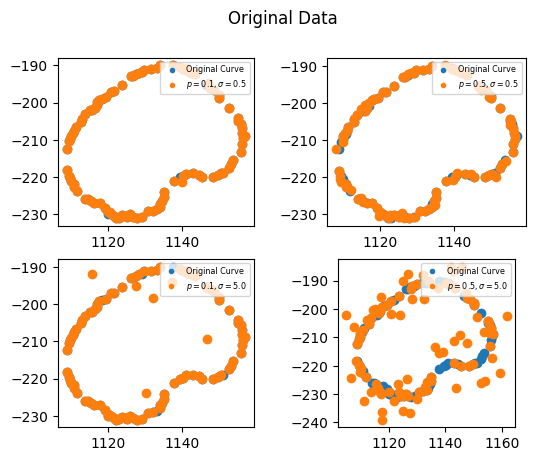

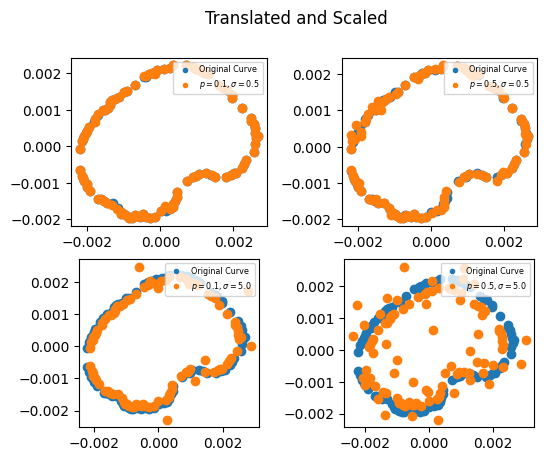

In [6]:
def curve_shot_noise(curves, probability, sigma) :
    """Add shot noise to discrete curves.
    
    Parameters
    ----------
    curves : array-like
        Discrete curves that are going to have noise added.
    probability : float
        Probability of a given point being noisy.
    sigma : float
        Width of the Gaussian to use for noise.
    
    Returns
    -------
    noisy_curves : array-like
        Curves with added Gaussian noise normal to the discrete curve.
    """
    normals = gs.empty(curves.shape)
    for idx, curve in enumerate(curves) :
        for jdx in range(curve.shape[0]) :
            t_1 = curve[(jdx + 1) % curve.shape[0]] - curve[jdx]
            t_2 = curve[jdx - 1] - curve[jdx]
            normal = t_1 * gs.linalg.norm(t_2) + gs.linalg.norm(t_1) * t_2
            if gs.linalg.norm(normal) > 0 :
                normals[idx, jdx] = normal / gs.linalg.norm(normal)
            else :
                normals[idx, jdx] = normal
    noisy_curves = curves + normals * gs.random.normal(0.0, sigma, size = (normals.shape[0], normals.shape[1], 1)) * gs.random.choice([0, 1], size = (normals.shape[0], normals.shape[1], 1), p = [1 - probability, probability])
    return noisy_curves

def cancer_shot_plot_original(num_cell, k_sampling_points) :
    """Plot original cancer cell data against data with noise added.
    Plots four example noisy data sets with parameters
        - p = 0.1, sigma = 0.5
        - p = 0.5, sigma = 0.5
        - p = 0.1, sigma = 5.0
        - p = 0.5, sigma = 5.0
    
    Parameters
    ----------
    num_cell : int, in the range 0 - 650
        Pick which cancer cell dataset to add noise to and plot.
    k_sampling_points : int
        Number of points to sample on each curve.
    
    Returns
    -------
    Four plots
    """

    cells, lines, treatments = data_utils.load_cells()
    inter_curves = preprocess(interpolate_curves(cells, k_sampling_points))

    r2 = Euclidean(dim = 2)
    curves_r2 = DiscreteCurves(ambient_manifold = r2)
    preshape = PreShapeSpace(m_ambient = 2, k_landmarks = k_sampling_points)
    shape_bundle = SRVShapeBundle(ambient_manifold = r2, k_sampling_points = k_sampling_points)

    noisy_curves_01 = curve_shot_noise(inter_curves, 0.1, 0.5)
    noisy_curves_02 = curve_shot_noise(inter_curves, 0.5, 0.5)
    noisy_curves_03 = curve_shot_noise(inter_curves, 0.1, 5.0)
    noisy_curves_04 = curve_shot_noise(inter_curves, 0.5, 5.0)
    noisy_curves = [noisy_curves_01, noisy_curves_02, noisy_curves_03, noisy_curves_04]
        
    label_to_str = {0 : "Original Curve", 1 : r'$p = 0.1, \sigma = 0.5$', 2 : r'$p = 0.5, \sigma = 0.5$', 3 : r'$p = 0.1, \sigma = 5.0$', 4 : r'$p = 0.5, \sigma = 5.0$'}

    fig = plt.figure()
    fig.suptitle('Original Data')
    ax01 = fig.add_subplot(221)
    ax02 = fig.add_subplot(222)
    ax03 = fig.add_subplot(223)
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
        
    for axi in ax:
        axi.set_aspect('equal', 'box')
        
    for i in range(len(ax)) :
        ax[i].plot()
        ax[i].scatter(inter_curves[num_cell][:, 0], inter_curves[num_cell][:, 1], label = label_to_str[0])
        ax[i].scatter(noisy_curves[i][num_cell][:, 0], noisy_curves[i][num_cell][:, 1], label = label_to_str[i + 1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')

    plt.show()

def cancer_shot_plot_scaled(num_cell, k_sampling_points) :
    """Plot original cancer cell data against data with noise added.
    Plots four example noisy data sets with parameters
        - p = 0.1, sigma = 0.5
        - p = 0.5, sigma = 0.5
        - p = 0.1, sigma = 5.0
        - p = 0.5, sigma = 5.0
    
    Parameters
    ----------
    num_cell : int, in the range 0 - 650
        Pick which cancer cell dataset to add noise to and plot.
    k_sampling_points : int
        Number of points to sample on each curve.
    
    Returns
    -------
    Four plots.
    """

    cells, lines, treatments = data_utils.load_cells()
    inter_curves = preprocess(interpolate_curves(cells, k_sampling_points))

    r2 = Euclidean(dim = 2)
    curves_r2 = DiscreteCurves(ambient_manifold = r2)
    preshape = PreShapeSpace(m_ambient = 2, k_landmarks = k_sampling_points)
    shape_bundle = SRVShapeBundle(ambient_manifold = r2, k_sampling_points = k_sampling_points)

    inter_curves_preshape = preshape.projection(inter_curves)
    inter_curves_preshape = 1 / curve_length(inter_curves_preshape) * inter_curves_preshape

    noisy_curves_01 = curve_shot_noise(inter_curves, 0.1, 0.5)
    noisy_curves_02 = curve_shot_noise(inter_curves, 0.5, 0.5)
    noisy_curves_03 = curve_shot_noise(inter_curves, 0.1, 5.0)
    noisy_curves_04 = curve_shot_noise(inter_curves, 0.5, 5.0)
    noisy_curves = gs.array([noisy_curves_01, noisy_curves_02, noisy_curves_03, noisy_curves_04])
    noisy_curves_preshape = gs.empty(noisy_curves.shape)

    for idx, curve in enumerate(noisy_curves) :
        temp_curve = preshape.projection(curve)
        temp_curve = 1 / curve_length(temp_curve) * temp_curve
        noisy_curves_preshape[idx] = temp_curve
        
    label_to_str = {0 : "Original Curve", 1 : r'$p = 0.1, \sigma = 0.5$', 2 : r'$p = 0.5, \sigma = 0.5$', 3 : r'$p = 0.1, \sigma = 5.0$', 4 : r'$p = 0.5, \sigma = 5.0$'}

    fig = plt.figure()
    fig.suptitle('Translated and Scaled')
    ax01 = fig.add_subplot(221)
    ax02 = fig.add_subplot(222)
    ax03 = fig.add_subplot(223)
    ax04 = fig.add_subplot(224)
    ax = [ax01, ax02, ax03, ax04]
        
    for axi in ax:
        axi.set_aspect('equal', 'box')
        
    for i in range(len(ax)) :
        ax[i].plot()
        ax[i].scatter(inter_curves_preshape[num_cell][:, 0], inter_curves_preshape[num_cell][:, 1], label = label_to_str[0])
        ax[i].scatter(noisy_curves_preshape[i][num_cell][:, 0], noisy_curves_preshape[i][num_cell][:, 1], label = label_to_str[i + 1])
        ax[i].legend(markerscale = 0.5, fontsize = 'xx-small', loc = 'upper right')

    plt.show()

num_curve = 50
k_sampling_points = 100
cancer_shot_plot_original(num_curve, k_sampling_points)
cancer_shot_plot_scaled(num_curve, k_sampling_points)

## Citations

[1] Zhang, Jing, et al. “Learning from Crowdsourced Labeled Data: A Survey.” Artificial Intelligence Review, vol. 46, no. 4, 2 July 2016, pp. 543–576, __[link](https://doi.org/10.1007/s10462-016-9491-9)__. <br>

[2] Mathis, Alexander, et al. “DeepLabCut: Markerless Pose Estimation of User-Defined Body Parts with Deep Learning.” Nature Neuroscience, vol. 21, no. 9, 20 Aug. 2018, pp. 1281–1289, __[link](https://doi.org/10.1038/s41593-018-0209-y)__. <br>

[3] Wang, Dan, and Yi Shang. “A New Active Labeling Method for Deep Learning.” IEEE Xplore, 1 July 2014, __[link](ieeexplore.ieee.org/abstract/document/6889457)__. <br>

[4] Borlund, Pia. “The Concept of Relevance in IR.” Journal of the American Society for Information Science and Technology, vol. 54, no. 10, 2003, pp. 913–925, __[link](https://doi.org/10.1002/asi.10286)__. <br>

[5] Nettleton, David F., et al. “A Study of the Effect of Different Types of Noise on the Precision of Supervised Learning Techniques.” Artificial Intelligence Review, vol. 33, no. 4, 27 Jan. 2010, pp. 275–306, __[link](https://doi.org/10.1007/s10462-010-9156-z)__. <br>

[6] Gupta S., Gupta A. "Dealing with Noise Problem in Machine Learning Data-sets: A Systematic Review." Procedia Computer Science, Volume 161, 2019, __[link](https://doi.org/10.1016/j.procs.2019.11.146)__. <br>

[7] Hasan, R. and Chu, C. "Noise in Datasets: What Are the Impacts on Classification Performance?." In Proceedings of the 11th International Conference on Pattern Recognition Applications and Methods - ICPRAM, 2022, pages 163-170, __[link](https://doi.org/10.5220/0010782200003122)__. <br>

[8] Devilliers L., Allassonnière S., et al. "Template Estimation in Computational Anatomy: Fréchet Means Top and Quotient Spaces Are Not Consistent." SIAM Journal on Imaging Sciences, Volume 10, 2017, __[link](https://epubs.siam.org/doi/abs/10.1137/16M1083931)__. <br>

[9] Miolane N., Pennec X. "Biased Estimators on Quotient Spaces." In: Nielsen, F., Barbaresco, F. (eds) Geometric Science of Information. GSI 2015. Lecture Notes in Computer Science(), vol 9389. Springer, Cham. __[link](https://doi.org/10.1007/978-3-319-25040-3_15)__. <br>

[10] Miolane N., Holmes S., et al. "Template Shape Estimation: Correcting an Asymptotic Bias." SIAM Journal on Imaging Sciences, 2017 __[link](https://epubs.siam.org/doi/abs/10.1137/16M1084493)__. <br>

[11] Bigot J., Charlier B. "On the Consistency of Fréchet means in Deformable Models for Curve and Image Analysis." Electron. J. Statist. 5 1054 - 1089, 2011, __[link](https://doi.org/10.1214/11-EJS633)__. <br>

[12] Du J., Dryden I., et al. "Size and Shape Analysis of Error-Prone Shape Data." Journal of the American Statistical Association, 110:509, 368-379, 2015, __[link](https://doi.org/10.1080/01621459.2014.908779)__. <br>

[13] Canducci M. , Tiño P., et al. "Probabilistic Modelling of General Noisy Multi-Manifold Data Sets." Artificial Intelligence, Volume 302, 2022, __[link](https://doi.org/10.1016/j.artint.2021.103579)__. <br>

[14] Yang T., Fu D., Meng J. "A Manifold-Based Dimension Reduction Algorithm Framework for Noisy Data Using Graph Sampling and Spectral Graph." Complexity, 2020, __[link](https://doi.org/10.1155/2020/8954341)__. <br>